<a href="https://colab.research.google.com/github/golnoushfarzan/Thesis/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import numpy as np
#this one is used to compute binomial coefficients (for C_3)
from scipy.special import comb
#This one is used for numerical integration of a given function over a specified interval (for I term)
from scipy.integrate import quad
import mpmath
from functools import partial # This one is used to create a version of a function with some arguments fixed(for optimization)
from scipy.optimize import minimize
import pandas as pd
from scipy.special import gamma #For optimization of error term
import matplotlib.pyplot as plt

#This is the computation for C3 on the half line:

In [255]:
# Define C3 function as in equation 2.25. This one is for \sigma_1

# Define b1(X_0) based on the provided formula in equation 3.11
def b1(X_0):
    return (6 / np.pi**2) + (0.1333 / np.sqrt(X_0))

# Define m_0 based on the provided formula in equation 2.82
def m0():
    return np.sqrt(1 + (2 / 3) * np.sqrt(6 / 5))

# Define b2(X_0) as a constant value in eq 3.15
def b2(X_0):
    return 1.048  # Given value for b2(X_0) for X_0 \geq 1000

# Define D1 and D2 as given in equation 4.25
def D1(X):
    return 6 / np.pi**2 + b2(X) / np.log(X)

def D2(X):
    return (np.pi * m0() * b1(X) / np.log(X)) + (6 * m0() / (np.pi * X)) + (np.pi * m0() * b2(X) / (X * np.log(X)))

# Define the integral I_alpha_beta as in equation \eqref{eq:2.23} (2.25)
def I_alpha_beta(A, n, alpha, beta):
    def integrand(x):
        return x**A * np.exp(-alpha * x**beta) * (np.log(x)**n)

    result, _ = quad(integrand, 0, np.inf)
    return result

# Define constants(Example value)
X = 3e12
T2 =  3e12
alpha = 0.241
beta = 2

j_1 = 0.618
j_3 = float(mpmath.zeta(1/2)**2)

a = 4/3
b = 2
# List of values for a_i, b_i, and d_i based on the table of 4.1 (for sigma_1)
a_i_values = [0, -1/6, -1/3, -1/3, -1/2, -2/3, -1, -7/6, -4/3, -4/3, -3/2, -5/3]
b_i_values = [0, 0, 0, -2, -2, -2, 0, 0, 0, -2, -2, -2]

def compute_d_i(X, D1, D2):
    """
    Calculate the d_i values based on the provided formula.
    """

    d_i_values = [1,
                  2 / np.sqrt(D1(X) * np.log(X)),
                  1 / (D1(X) * np.log(X)),
                  j_3 / j_1**2,
                  j_3 / (j_1**2 * np.sqrt(D1(X) * np.log(X))),
                  j_3 / (2 * j_1**2 * D1(X) * np.log(X)),
                  (X * D2(X)) / D1(X),
                  2 * X * D2(X) / (D1(X) * np.sqrt(D1(X) * np.log(X))),
                  (X * D2(X)) / (D1(X)**2 * np.log(X)),
                  j_3 * D2(X) * X / (2 * j_1**2 * D1(X)),
                  j_3 * D2(X) * X / (j_1**2 * D1(X) * np.sqrt(D1(X) * np.log(X))),
                  j_3 * D2(X) * X / (j_1**2 * D1(X)**2 * np.log(X))]
    return d_i_values


# Define the d_i values based on the formula
#def compute_d_i(i, X, D1, D2, j_1, j_3):
    """
    Calculate the d_i values based on the provided formula.
    """
"""
    D1_value = D1(X)
    D2_value = D2(X)

    if i == 0:
        return 1
    elif i == 1:
        return 2 / np.sqrt(D1(X) * np.log(X))
    elif i == 2:
        return 1 / (D1(X) * np.log(X))
    elif i == 3:
        return j_3 / j_1**2
    elif i == 4:
        return j_3 / (j_1**2 * np.sqrt(D1(X) * np.log(X)))
    elif i == 5:
        return j_3 / (2 * j_1**2 * D1(X) * np.log(X))
    elif i == 6:
        return (X * D2(X)) / D1(X)
    elif i == 7:
        return 2 * X * D2(X) / (D1(X) * np.sqrt(D1(X) * np.log(X)))
    elif i == 8:
        return (X * D2(X)) / (D1(X)**2 * np.log(X))
    elif i == 9:
        return j_3 * D2(X) * X / (2 * j_1**2 * D1(X))
    elif i == 10:
        return j_3 * D2(X) * X / (j_1**2 * D1(X) * np.sqrt(D1(X) * np.log(X)))
    elif i == 11:
        return j_3 * D2(X) * X / (j_1**2 * D1(X)**2 * np.log(X))
"""



# Define C3 function as equation 2.25. This one is for \sigma_1
def C3(T2, alpha, beta, a, a_i_values, b, b_i_values,  d_i_values, printing=0):
    log_T = np.log(T2)

    C31_value = 0

    for i in range(len(a_i_values)):
        a_i = a_i_values[i]
        b_i = b_i_values[i]
        d_i = d_i_values[i]
        # Calculate d_i using the function for d_i

        inner_sum = 0
        # Summation over k
        for k in range(b + b_i + 1):
            binomial_coeff = comb(b + b_i, k)
            integral_value = I_alpha_beta(beta + a + a_i - 1, b + b_i - k, alpha, beta)
            inner_sum += binomial_coeff * integral_value / (log_T**(b + b_i - k))

        # definition of C3
        C31_value += d_i * T2**a_i * (log_T**b_i) * inner_sum

    if printing > 0:
        print(f"C3_value is {C31_value}")
    return C31_value

C31_value = C3(T2, alpha, beta, a, a_i_values, b, b_i_values, compute_d_i(X, D1, D2))
print(f"The value of C_3 on the half line is: {C31_value}")

The value of C_3 on the half line is: 5.473783347188228


In [256]:
a_second = 109/82
b_second = 0
# List of values for a_i, b_i, and d_i based on the table of 4.1 (for sigma_1)
a_i_values_second = [0, -27/164, -27/82, -27/82, -81/164, -109/164, -1, -191/164, -109/82, -109/82, -164/81, -136/82]
b_i_values_second = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
omega_5 = 66.7
omega_7 = mpmath.zeta(1/2) ** 2

def compute_second_d_i(X, D1, D2):
    """
    Calculate the d_i values based on the provided formula.
    """
    D1_value = D1(X)
    D2_value = D2(X)

    d_i_values_second = [1,
                  2 /(omega_5 * (np.sqrt(D1(X) * np.log(X)))),
                  omega_7 / (omega_5**2),
                  1 / (D1(X) * (omega_5**2) * np.log(X)),
                  (2 * omega_7) / (((omega_5**3)) * np.sqrt(D1(X) * np.log(X))),
                  omega_7 / (omega_5**4 * D1(X) * np.log(X)),
                  (X * D2(X)) / D1(X),
                  (2 * X * D2(X)) / (D1(X) * np.sqrt(D1(X) * np.log(X))),
                  (X * D2(X) * omega_7) / (D1(X) * omega_5**2),
                  (D2(X) * X) / (2 * D1(X)**2 * omega_5**2 * np.log(X) ),
                  (2 * omega_7 * D2(X) * X) / (omega_5**3 * D1(X) * np.sqrt(D1(X) * np.log(X))),
                  (omega_7 * D2(X) * X) / (2 * omega_5**4 * D1(X)**2 * np.log(X))]
    return d_i_values_second


C31_value_s = C3(T2, alpha, beta, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2))

print(f"The second version of C_3 at sigma_1 is: {C31_value_s}")
# Define D4' as equation 4.54

def D4prime(X):
    return D1(X) * (omega_5 ** 2)

D4prime_value = D4prime(X)
print(f"The value of D_4' is: {D4prime_value}")

The second version of C_3 at sigma_1 is: 5.15234699639508
The value of D_4' is: 2866.8874805874652


In [257]:
# Define D4 as equation 4.54
j_1 = 0.618
def D4(X):
    return D1(X) * (j_1 ** 2)

D4_value = D4(X)
print(f"The value of D_4 is: {D4_value}")

The value of D_4 is: 0.24611377987225733


In [258]:
log_X = np.log(X)
print(f"The value of log_X is: {log_X}")

The value of log_X is: 28.729633404596658


In [259]:
C31_times_D4 = C31_value * D4_value
print(f"The value of C3 . D4 on the half line is: {C31_times_D4}")
C31_times_D4_prime = C31_value_s * D4prime_value
print(f"The value of C3 . D4' on the half line is: {C31_times_D4_prime}")

The value of C3 . D4 on the half line is: 1.3471735097783113
The value of C3 . D4' on the half line is: 14771.1990996075


#FIRST EXPONENT

In [260]:
delta = 0.36
sigma_2 = 1 + (delta / log_X)
sigma_1 = 0.5
delta_2 = 0.35
sigma = 0.9
sigma_prime = sigma - (delta_2 / np.log(T2))
exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
print(f"The value of exponent is: {exponent}")

The value of exponent is: 0.24332821337602245


#This is the final result on the half line (A1^exponent):

In [261]:
result1 = (C31_times_D4) ** exponent
print(f"The result for the half line: {result1}")
result1_s= (C31_times_D4_prime) ** exponent
print(f"The result for the half line: {result1_s}")

The result for the half line: 1.0752077780603713
The result for the half line: 10.3403796847098


#This is the computation for C3 on the sigme2:

In [262]:
# Define C3 function as in equation 2.25. This one is for \sigma_2
gamma = mpmath.euler
# Define b_4 function based on the given equation 3.40
def b_4(X_0):
    return 0.428 + 0.895 / np.log(X_0)

# Define b3(X_0) as a constant value in eq 3.21
def b_3(X_0):
    return 0.605  # Given value for b2(X_0) for X_0 \geq 1000

# Define m_0 based on the provided formula in equation 2.82
def m0():
    return np.sqrt(1 + (2 / 3) * np.sqrt(6 / 5))

# Define D_5 and D_6 based on the given equations
def D5(delta, X):
    """
    Calculate D_5 for given delta and X, using m0 and gamma.
    """
    b4_X = b_4(X)
    return (np.pi * m0() * b4_X) / (2 * delta) * np.exp((2 * delta * float(gamma) / np.log(X)))

def D6(delta, X):
    """
    Calculate D_6 for given delta and X, using gamma.
    """
    b3_X = b_3(X)
    b4_X = b_4(X)
    return (b4_X / (5 * delta * np.exp(float(gamma)))) + (b3_X * np.exp(-2 * delta)) / (np.log(X)**2)


# Define constants(Example value)
X = 3e12
T2 = 3e12
alpha = 0.241
beta = 2
a_prime = 1
b_prime = 0

# List of values for a_i', b_i', and d_i' based on the table of 4.3 (for sigma_2)
a_i_prime_values = [0, -1, -1]
b_i_prime_values = [0, 0, 0]

# Define the d_i values based on your formula
def compute_d_i_second(X, D5, D6, delta):
    """
    Calculate the d_i values based on the provided formula.
    """
    D5_value = D5(delta, X)
    D6_value = D6(delta, X)

    d_i_values = [1, (D5(delta, X) * X ) / D6(delta, X), np.pi * m0()]
    return d_i_values


C32_value = C3(T2, alpha, beta, a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta))

print(f"The value of C_3 at sigma_2 is: {C32_value}")

The value of C_3 at sigma_2 is: 42.38082568387099


In [263]:
# Define D6
def D6(delta, X):
    """
    Calculate D_6 for given delta and X, using gamma.
    """
    b3_X = b_3(X)
    b4_X = b_4(X)
    return (b4_X / (5 * delta * np.exp(float(gamma)))) + (b3_X * np.exp(-2 * delta)) / (np.log(X)**2)
D6_value = D6(delta, X)
print(f"The value of D_6 is: {D6_value}")

The value of D_6 is: 0.14357651963994592


In [264]:
C32_times_D6 = C32_value * D6_value
print(f"The value of C3 . D6 at sigma_2 is: {C32_times_D6}")

The value of C3 . D6 at sigma_2 is: 6.084891451157427


#SECOND EXPONENT

In [265]:
delta = 0.36
sigma_2 = 1 + (delta / np.log(X))
sigma_1 = 0.5
delta_2 = 0.35
sigma = 0.9
sigma_prime = sigma - (delta_2 / np.log(T2))
exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)
print(f"The value of exponent2 is: {exponent2}")

The value of exponent2 is: 0.7566717866239775


#This is the final result on sigma2 (A2^exponent2):

In [266]:
result2 = (C32_times_D6) ** exponent2
print(f"The result for sigma2: {result2}")

The result for sigma2: 3.9212270870277846


#This is the definition for \tilde{C_5} as equation 4.85.

In [267]:
def tilde_C5(sigma, alpha, beta, delta, delta_2, a, a_i, b, b_i, d_i,
              a_prime, a_i_prime, b_prime, b_i_prime, d_i_prime, T2, printing=0):
    X = T2

    sigma_2 = 1 + (delta / np.log(X))
    sigma_1 = 0.5
    sigma_prime = sigma - (delta_2 / np.log(T2))
    exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
    exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)
    D4_value = D4(X)
    C31_value = C3(T2, alpha, beta, a, a_i_values, b, b_i_values, compute_d_i(X, D1, D2), printing-1)
    C31_times_D4 = C31_value * D4_value
    D6_value = D6(delta, X)
    D_5_value = D5(delta, X)
    C32_value = C3(T2, alpha, beta, a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), printing-1)
    C32_times_D6 = C32_value * D6_value
    tilde_C5_value = ((C31_times_D4) ** exponent) * ((C32_times_D6) ** exponent2)
    return tilde_C5_value

tilde_C5(sigma, alpha, beta, delta, delta_2, a, a_i_values, b, b_i_values, compute_d_i(X, D1, D2),
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,2)


C3_value is 5.473783347188228
C3_value is 42.38082568387099


4.216133863513286

In [268]:
def tilde_C5_second(sigma, alpha, beta, delta, delta_2, a, a_i, b, b_i, d_i,
              a_prime, a_i_prime, b_prime, b_i_prime, d_i_prime, T2, printing=0):
    X = T2

    sigma_2 = 1 + (delta / np.log(X))
    sigma_1 = 0.5
    sigma_prime = sigma - (delta_2 / np.log(T2))
    exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
    exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)
    D4prime_value = D4prime(X)
    C31_value_s = C3(T2, alpha, beta, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2), printing-1)
    C31_times_D4_prime = C31_value_s * D4prime_value
    result1_s= (C31_times_D4_prime) ** exponent
    D6_value = D6(delta, X)
    D_5_value = D5(delta, X)
    C32_value = C3(T2, alpha, beta, a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), printing-1)
    C32_times_D6 = C32_value * D6_value
    result2 = (C32_times_D6) ** exponent2
    tilde_C5_value_second = result1_s * result2
    return tilde_C5_value_second

tilde_C5_second(sigma, alpha, beta, delta, delta_2, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2),
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,2)


C3_value is 5.15234699639508
C3_value is 42.38082568387099


mpf('40.546976909836019')

#DEFINITION OF \breve{C_5}

In [269]:
exponent2upper = 2 * (sigma - sigma_1)
result2breve = (C32_times_D6) ** exponent2upper
print(f"The result for sigma2: {result2breve}")

The result for sigma2: 4.240355499784314


In [270]:
def breve_C5(sigma,alpha, beta, delta_2, a, a_i, b, b_i, d_i,
              a_prime, a_i_prime, b_prime, b_i_prime, d_i_prime, T2, printing=0):
    X = T2
    sigma_2 = 1 + (delta / np.log(X))
    sigma_1 = 0.5
    sigma_prime = sigma - (delta_2 / np.log(T2))
    exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
    exponent2upper = 2 * (sigma - sigma_1)

    D4_value = D4(X)
    C31_value = C3(T2, alpha, beta, a, a_i_values, b, b_i_values, compute_d_i(X, D1, D2),printing-1)
    C31_times_D4 = C31_value * D4_value
    D6_value = D6(delta, X)
    D_5_value = D5(delta, X)
    C32_value = C3(T2, alpha, beta, a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta),printing-1)
    C32_times_D6 = C32_value * D6_value
    breve_C5_value = ((C31_times_D4) ** exponent) * ((C32_times_D6) ** exponent2upper)
    return breve_C5_value

breve_C5(sigma, alpha, beta, delta_2, a, a_i_values, b, b_i_values, compute_d_i,
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,2)

C3_value is 5.473783347188228
C3_value is 42.38082568387099


4.5592632151091665

In [271]:
def breve_C5_second(sigma,alpha, beta, delta_2, a, a_i, b, b_i, d_i,
              a_prime, a_i_prime, b_prime, b_i_prime, d_i_prime, T2, printing=0):
    X = T2
    sigma_2 = 1 + (delta / np.log(X))
    sigma_1 = 0.5
    sigma_prime = sigma - (delta_2 / np.log(T2))
    exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
    exponent2upper = 2 * (sigma - sigma_1)

    D4prime_value = D4prime(X)
    C31_value_s = C3(T2, alpha, beta, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2), printing-1)
    C31_times_D4_prime = C31_value_s * D4prime_value
    result1_s= (C31_times_D4_prime) ** exponent
    D6_value = D6(delta, X)
    D_5_value = D5(delta, X)
    C32_value = C3(T2, alpha, beta, a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta),printing-1)
    C32_times_D6 = C32_value * D6_value
    result2breve = (C32_times_D6) ** exponent2upper
    breve_C5_value_second = result1_s * result2breve
    return breve_C5_value_second

breve_C5_second(sigma, alpha, beta, delta_2, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2),
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,2)

C3_value is 5.15234699639508
C3_value is 42.38082568387099


mpf('43.846885865917322')

#DEFINITION OF \hat{C5}:

In [272]:
sigma_1_prime = 0.9
sigma_2_prime = 0.9

In [273]:
def hatC5(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, a, a_i, b, b_i, d_i,
              a_prime, a_i_prime, b_prime, b_i_prime, d_i_prime, T2,printing=0):
    """
    Function to compute hat_C5 based on the conditional logic provided:
    If A2 >= A1, it computes bre_C5(sigma_prime_2, T0, delta1, delta2).
    Otherwise, it computes tilde_C5(sigma_prime_1, T0, delta1, delta2).
    """
    X=T2
    sigma_2 = 1 + (delta / np.log(X))
    sigma_1 = 0.5

    D4_value = D4(X)
    C31_value = C3(T2, alpha, beta, a, a_i_values, b, b_i_values, compute_d_i(X, D1, D2), printing-1)
    C31_times_D4 = C31_value * D4_value
    D6_value = D6(delta, X)
    D_5_value = D5(delta, X)
    C32_value = C3(T2, alpha, beta, a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), printing-1)
    C32_times_D6 = C32_value * D6_value

    if C32_times_D6 >= C31_times_D4:
        sigma_prime = sigma_2_prime - (delta_2 / np.log(T2))
        exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
        exponent2upper = 2 * (sigma_2_prime - sigma_1)
        breve_C5_value = ((C31_times_D4) ** exponent) * ((C32_times_D6) ** exponent2upper)
        return breve_C5_value
    else:
        sigma_prime = sigma_1_prime - (delta_2 / np.log(T2))
        exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
        exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)
        tilde_C5_value = ((C31_times_D4) ** exponent) * ((C32_times_D6) ** exponent2)
        return tilde_C5_value



hatC5_value = hatC5(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, a, a_i_values, b, b_i_values, compute_d_i(X, D1, D2),
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,2)

print(f"The result for hatC5 is: {hatC5_value}")

C3_value is 5.473783347188228
C3_value is 42.38082568387099
The result for hatC5 is: 4.5592632151091665


In [274]:
def hatC5_second(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, a, a_i, b, b_i, d_i,
              a_prime, a_i_prime, b_prime, b_i_prime, d_i_prime, T2,printing=0):
    """
    Function to compute hat_C5 based on the conditional logic provided:
    If A2 >= A1, it computes bre_C5(sigma_prime_2, T0, delta1, delta2).
    Otherwise, it computes tilde_C5(sigma_prime_1, T0, delta1, delta2).
    """
    X=T2
    sigma_2 = 1 + (delta / np.log(X))
    sigma_1 = 0.5

    D4prime_value = D4prime(X)
    C31_value_s = C3(T2, alpha, beta, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2), printing-1)
    C31_times_D4_prime = C31_value_s * D4prime_value
    D6_value = D6(delta, X)
    D_5_value = D5(delta, X)
    C32_value = C3(T2, alpha, beta, a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), printing-1)
    C32_times_D6 = C32_value * D6_value

    if C32_times_D6 >= C31_times_D4_prime:
        sigma_prime = sigma_2_prime - (delta_2 / np.log(T2))
        exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
        exponent2upper = 2 * (sigma_2_prime - sigma_1)
        breve_C5_value_second = ((C31_times_D4_prime) ** exponent) * ((C32_times_D6) ** exponent2upper)
        return breve_C5_value_second
    else:
        sigma_prime = sigma_1_prime - (delta_2 / np.log(T2))
        exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
        exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)
        tilde_C5_value_second = ((C31_times_D4_prime) ** exponent) * ((C32_times_D6) ** exponent2)
        return tilde_C5_value_second



hatC5_value_second = hatC5_second(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2),
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,2)

print(f"The result for hatC5 is: {hatC5_value_second}")

C3_value is 5.15234699639508
C3_value is 42.38082568387099
The result for hatC5 is: 40.546976909836


# Define C1 as in equation 4.18

In [275]:
def C1(sigma, T2, alpha, beta):
      C1_value = np.exp(alpha * (sigma / T2)**beta)
      return C1_value
C1_value1 = C1(sigma_1, T2, alpha, beta)
C1_value2 = C1(sigma_2, T2, alpha, beta)
print(f"The result for C1 on half line is: {C1_value1}")
print(f"The result for C1 on sigma2 is: {C1_value2}")
C1_value1 ** exponent
C1_value2 ** exponent2

The result for C1 on half line is: 1.0
The result for C1 on sigma2 is: 1.0


1.0

# Define C2 as in equation 4.18

In [276]:
T1 = 3 * 1e12
def C2(sigma, T1, T2, alpha):
      C2_value = ((1 - (1 / T1))**2) * np.exp((alpha * (sigma / T2)**2) - alpha)
      return C2_value
C2_value = C2(sigma, T1, T2, alpha)
print(f"The result for C2 is: {C2_value}")

The result for C2 is: 0.7858416263878217


#DEFINITION OF C4

In [277]:
# Define C4 as in equation 4.84
def C4(sigma, T2, T1, alpha, beta, delta, delta_2,printing=0):
    X=T2
    sigma_2 = 1 + (delta / np.log(X))
    sigma_1 = 0.5
    sigma_prime = sigma - (delta_2 / np.log(T2))
    exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
    exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)

    C2_value = C2(sigma_prime, T1, T2, alpha)
    C1_value1 = C1(sigma_1, T2, alpha, beta)
    C1_value2 = C1(sigma_2, T2, alpha, beta)

    C4_value =  (alpha * beta * (C1_value1**exponent) *  (C1_value2**exponent2)) / C2_value
    return C4_value


C4_value = C4(sigma, T2, T1, alpha, beta, delta, delta_2,2)
print(f"The result for C4 is: {C4_value}")

The result for C4 is: 0.6133551390189752


#DEFINITION OF \HAT{C4}:(MAX OF C4):

In [278]:
def hatC4(sigma_1_prime, sigma_2_prime,T2, T1, alpha, beta,  delta, delta_2,printing=0):
    hatC4_value = ((1 - (1 / T1))**-(2)) * alpha * beta * np.exp(alpha) * np.exp((alpha/(4*T2)) * (sigma_1_prime + sigma_2_prime)**2)
    return hatC4_value

hatC4_value = hatC4(sigma_1_prime, sigma_2_prime, T2, T1, alpha, beta, delta, delta_2,2)
print(f"The result for hatC4 is: {hatC4_value}")

The result for hatC4 is: 0.6133551390190151


#DEFINITION OF C6:

In [279]:
# Define C6 as in equation 4.84
def C6(sigma, T2, a, a_prime, b, b_prime, delta, delta_2,printing=0):

    sigma_prime = sigma - (delta_2 / np.log(T2))
    sigma_2 = 1 + (delta / np.log(T2))
    sigma_1 = 0.5
    exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
    exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)

    numerator = (
        T2 ** ((a * exponent) + ((a_prime - 1) * exponent2)) *
        (np.log(T2) ** (((b + 1) * exponent) + ((b_prime + 2) * exponent2)))
    )

    # Denominator
    denominator = (
        T2 ** ((2 * a * (1 - sigma)) + ((a_prime - 1) * (2 * sigma - 1))) *
        (np.log(T2) ** ((2 * (b + 1) * (1 - sigma)) + ((b_prime + 2) * (2 * sigma - 1))))
    )
    C6_value =  numerator / denominator
    return C6_value


C6_value = C6(sigma, T2, a, a_prime, b, b_prime, delta, delta_2,2)
print(f"The result for C6 is: {C6_value}")

The result for C6 is: 6.081378015582197


In [280]:
# Define C6 as in equation 4.84
def C6_second(sigma, T2, a, a_prime, b, b_prime, delta, delta_2,printing=0):

    sigma_prime = sigma - (delta_2 / np.log(T2))
    sigma_2 = 1 + (delta / np.log(T2))
    sigma_1 = 0.5
    exponent = (sigma_2 - sigma_prime) / (sigma_2 - sigma_1)
    exponent2 = (sigma_prime - sigma_1) / (sigma_2 - sigma_1)

    numerator = (
        T2 ** ((a_second * exponent) + ((a_prime - 1) * exponent2)) *
        (np.log(T2) ** (((b_second + 1) * exponent) + ((b_prime + 2) * exponent2)))
    )

    # Denominator
    denominator = (
        T2 ** ((2 * a_second * (1 - sigma)) + ((a_prime - 1) * (2 * sigma - 1))) *
        (np.log(T2) ** ((2 * (b_second + 1) * (1 - sigma)) + ((b_prime + 2) * (2 * sigma - 1))))
    )
    C6_value_second =  numerator / denominator
    return C6_value_second


C6_value_second = C6_second(sigma, T2, a_second, a_prime, b_second, b_prime, delta, delta_2,2)
print(f"The result for C6 is: {C6_value_second}")

The result for C6 is: 4.523043019837011


#breveC6:

In [281]:
def breveC6(sigma_prime, T2, a, a_prime, delta, delta_2,printing=0):
    sigma_prime = sigma - (delta_2 / np.log(T2))
    breveC6_value = np.exp((1+a-a_prime) * (2 * delta * (2* sigma_prime -1) + 2 * delta_2))
    return breveC6_value


breveC6_value = breveC6(sigma, T2, a, a_prime, delta, delta_2,2)
print(f"The result for breveC6 is: {breveC6_value}")

The result for breveC6 is: 5.354529565142544


In [282]:
def breveC6_second(sigma_prime, T2, a, a_prime, delta, delta_2,printing=0):
    sigma_prime = sigma - (delta_2 / np.log(T2))
    breveC6_value_second = np.exp((1+a_second-a_prime) * (2 * delta * (2* sigma_prime -1) + 2 * delta_2))
    return breveC6_value_second


breveC6_value_second = breveC6_second(sigma, T2, a_second, a_prime, delta, delta_2,2)
print(f"The result for breveC6 is: {breveC6_value_second}")

The result for breveC6 is: 5.32720745359925


#DEFINITION OF HAT_C6

In [283]:
def hatC6(sigma_1_prime, sigma_2_prime, a, a_prime, b, b_prime, delta, delta_2, T2,printing=0):
    """
    Function to compute hat_C6 based on the conditional logic provided:
    If b-b_prime > 1, it computes C6(sigma_2_prime, T2, a, a_prime, b, b_prime).
    Otherwise, it computes breveC6(sigma_1_prime, T2, a, a_prime, delta, delta_2).

    C6_value = C6(sigma_prime, T2, a, a_prime, b, b_prime)
    breveC6_value = breveC6(sigma_1_prime, T2, a, a_prime, delta, delta_2)
    Returns:
         Value of \(\hat{C_6}\).
    """
    if b-b_prime > 1:
        return  C6(sigma_2_prime, T2, a, a_prime, b, b_prime, delta, delta_2,printing-1)
    else:
        return breveC6(sigma_2_prime, T2, a, a_prime, delta, delta_2)
hatC6_value = hatC6(sigma_1_prime, sigma_2_prime, a, a_prime, b, b_prime,delta, delta_2, T2,2)
print(f"The result for hatC6 is: {hatC6_value}")

The result for hatC6 is: 6.081378015582197


In [284]:
def hatC6_second(sigma_1_prime, sigma_2_prime, a, a_prime, b, b_prime, delta, delta_2, T2,printing=0):
    """
    Function to compute hat_C6 based on the conditional logic provided:
    If b-b_prime > 1, it computes C6_second(sigma_2_prime, T2, a_second, a_prime, b_second, b_prime).
    Otherwise, it computes breveC6(sigma_1_prime, T2, a_second, a_prime, delta, delta_2).

    C6_value_second = C6_second(sigma_prime, T2, a_second, a_prime, b_second, b_prime)
    breveC6_value_second = breveC6_second(sigma_1_prime, T2, a_second, a_prime, delta, delta_2)
    Returns:
         Value of \(\hat{C_6_second}\).
    """
    if b-b_prime > 1:
        return  C6_second(sigma_2_prime, T2, a_second, a_prime, b_second, b_prime, delta, delta_2,printing-1)
    else:
        return breveC6_second(sigma_2_prime, T2, a_second, a_prime, delta, delta_2)
hatC6_value_second = hatC6_second(sigma_1_prime, sigma_2_prime, a_second, a_prime, b_second, b_prime,delta, delta_2, T2,2)
print(f"The result for hatC6 is: {hatC6_value_second}")

The result for hatC6 is: 5.32720745359925


In [285]:
def U(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a, a_i_values, b, b_i_values, compute_d_i, D1, D2,
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second, printing=0):
    hatC4_value = hatC4(sigma_1_prime, sigma_2_prime, T2, T1, alpha, beta,delta, delta_2, printing-1)
    hatC5_value = hatC5(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, a, a_i_values, b, b_i_values, compute_d_i(X, D1, D2),
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,printing-1)
    hatC6_value = hatC6(sigma_1_prime, sigma_2_prime, a, a_prime, b, b_prime,delta, delta_2, T2,printing-1)
    U_value = ((hatC4_value * hatC5_value * hatC6_value)/(2 * np.pi * delta_2))
    if printing>0:
        print(f"hatC4_value is: {hatC4_value}")
        print(f"hatC5_value is: {hatC5_value}")
        print(f"hatC6_value is: {hatC6_value}")
    return U_value

U_value = U(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a, a_i_values, b, b_i_values, compute_d_i,D1, D2,
              a_prime, a_i_prime_values, b_prime, b_i_prime_values,compute_d_i_second,2)
print(f"The result for U is: {U_value}")

hatC4_value is: 0.6133551390190151
hatC5_value is: 4.5592632151091665
hatC6_value is: 6.081378015582197
The result for U is: 7.733227043952999


In [286]:
def U_second(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a, a_i_values, b, b_i_values, compute_d_i, D1, D2,
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second, printing=0):
    hatC4_value = hatC4(sigma_1_prime, sigma_2_prime, T2, T1, alpha, beta,delta, delta_2, printing-1)
    hatC5_value_second = hatC5_second(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i(X, D1, D2),
              a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second(X, D5, D6, delta), T2,printing-1)
    hatC6_value_second = hatC6_second(sigma_1_prime, sigma_2_prime, a_second, a_prime, b_second, b_prime,delta, delta_2, T2,printing-1)
    U_value_second = ((hatC4_value * hatC5_value_second * hatC6_value_second)/(2 * np.pi * delta_2))
    if printing>0:
        print(f"hatC4_value is: {hatC4_value}")
        print(f"hatC5_value is: {hatC5_value_second}")
        print(f"hatC6_value is: {hatC6_value_second}")
    return U_value_second

U_value_second = U_second(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i,D1, D2,
              a_prime, a_i_prime_values, b_prime, b_i_prime_values,compute_d_i_second,2)
print(f"The result for U is: {U_value_second}")

hatC4_value is: 0.6133551390190151
hatC5_value is: 40.546976909836
hatC6_value is: 5.32720745359925
The result for U is: 60.2451631663255


#FOURTH INTEGRAL:

In [287]:
k=2

In [288]:
def E2(X, tau):
    term1 = (1 / (tau - 1)) * (((1/np.pi**2) * np.log(X)**3) + (0.745*np.log(X)**2) + (0.824*np.log(X)) + 0.461)
    term2 = (1 / ((tau - 1)**3)) * (((6/np.pi**2) * np.log(X)) + 1.49)
    term3 = (1 / ((tau - 1)**2)) * (((3/np.pi**2) * np.log(X)**2) + (1.49*np.log(X)) + 0.824)
    term4 = (1 / ((tau - 1)**4)) * (6/np.pi**2)
    term5 = (9.73 * X**(-1/4) * np.log(X)) / (tau - (3/4))
    term6 = (9.73 * X**(-1/4)) / (tau - (3/4))**2
    return (1 / X**(tau - 1)) * (term1 + term2 + term3 + term4 + term5 + term6)

In [289]:
def E3(k, X):
    term1 = (np.log(X) / (k * (np.log(X))**(k-1) * np.log(np.log(X)))) + (1 / (np.log(X))**(k-1))
    term2 = 1 + (1 / (k * np.log(np.log(X)))) + (float(gamma) / np.log(X))
    term3 = (7 * k * np.log(np.log(X))) / ((12 * X * np.log(X)) * (np.log(X) + k * np.log(np.log(X))))
    return term1 * (term2 + term3)

E3_value = E3(k, X)

In [290]:
def E4(k, X):
    E3_value = E3(k, X)
    return -np.log(1 - E3_value**2) / (E3_value**2)
E4_value = E4(k, X)

In [291]:
#this is actuall the whole upper bound for the fourth integral
def E5(k, X):
    mu = 1 + ((k * np.log(np.log(X))) / np.log(X))
    E4_value = E4(k, X)
    term1 = (X + 2 * np.pi * m0()) * E2(X, (2*mu))
    term2 = 2 * np.pi * m0() * E2(X, (2*mu - 1))
    return (E4_value * (term1 + term2))
E5_value = E5(k, X)

In [292]:
def objective(k):
    return E5(k, X)

lambdaoptX = lambda ADD: objective(ADD[0])

# Initial guess for [alpha, delta, delta_2]
initial_guess = [2]


bounds = [(2, 10)]

res = minimize(lambdaoptX, initial_guess, bounds=bounds, method='L-BFGS-B')

optimal_params = res.x
optimal_E5 = res.fun

print(f"Optimal parameters: k={optimal_params[0]}")
print(f"Minimum value of E5: {optimal_E5}")

Optimal parameters: k=3.625741791083096
Minimum value of E5: 9.325756934115785e-07


In [300]:
((3.62 * np.log(np.log(X))) / np.log(X))

0.4231068046525277

In [293]:
# It takes three parameters: alpha, delta, and delta_2 and assumed the other parameters are fixed
def U_partial(alpha, delta, delta_2):
    return U(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a, a_i_values, b, b_i_values, compute_d_i,D1, D2,
              a_prime, a_i_prime_values, b_prime, b_i_prime_values,compute_d_i_second)


lambdaoptX = lambda ADD: U_partial(ADD[0], ADD[1], ADD[2])

# Initial guess for [alpha, delta, delta_2]
initial_guess = [0.15, 0.33, 0.33]


bounds = [(0.001, 1), (0, 1), (0, 1)]

result = minimize(lambdaoptX, initial_guess, bounds=bounds, method='L-BFGS-B')

optimal_params = result.x
optimal_U = result.fun

print(f"Optimal parameters: alpha={optimal_params[0]}, delta={optimal_params[1]}, delta_2={optimal_params[2]}")
print(f"Minimum value of U: {optimal_U}")

Optimal parameters: alpha=0.2419871507835905, delta=0.36641375030212875, delta_2=0.3511175514777831
Minimum value of U: 7.732290624302065


In [294]:
# It takes three parameters: alpha, delta, and delta_2 and assumed the other parameters are fixed
def U_partial_second(alpha, delta, delta_2):
    return U_second(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a_second, a_i_values_second, b_second, b_i_values_second, compute_second_d_i,D1, D2,
              a_prime, a_i_prime_values, b_prime, b_i_prime_values,compute_d_i_second)


lambdaoptX_s = lambda ADD: U_partial_second(ADD[0], ADD[1], ADD[2])

# Initial guess for [alpha, delta, delta_2]
initial_guess = [0.15, 0.33, 0.33]


bounds = [(0.001, 1), (0.01, 1), (0.01, 1)]

resultsecond = minimize(lambdaoptX_s, initial_guess, bounds=bounds, method='L-BFGS-B')

optimal_params_s = resultsecond.x
optimal_U_second = resultsecond.fun

print(f"Optimal parameters: alpha={optimal_params[0]}, delta={optimal_params[1]}, delta_2={optimal_params[2]}")
print(f"Minimum value of U: {optimal_U_second}")

Optimal parameters: alpha=0.2419871507835905, delta=0.36641375030212875, delta_2=0.3511175514777831
Minimum value of U: 58.9469358669482


In [295]:
sigma_1_prime_values_1 = np.arange(0.75, 0.99, 0.01)
sigma_1_prime_values_2 = np.arange(0.990, 1.000, 0.001)

# Here we combine both ranges
sigma_1_prime_values = np.concatenate((sigma_1_prime_values_1, sigma_1_prime_values_2))

# Generate corresponding sigma_2' values(need it after 0.99)
sigma_2_prime_values = np.array([
    s1 + (0.01 if s1 < 0.99 else 0.001) for s1 in sigma_1_prime_values
])

# sigma_2' should be less than 1
valid_indices = sigma_2_prime_values <= 1
sigma_1_prime_values = sigma_1_prime_values[valid_indices]
sigma_2_prime_values = sigma_2_prime_values[valid_indices]

results = []

for sigma_1_prime, sigma_2_prime in zip(sigma_1_prime_values, sigma_2_prime_values):
    def U_partial(alpha, delta, delta_2):
        return U(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a, a_i_values, b, b_i_values, compute_d_i, D1, D2,
                  a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second)

    lambdaoptX = lambda ADD: U_partial(ADD[0], ADD[1], ADD[2])

    initial_guess = [0.15, 0.33, 0.33]
    bounds = [(0.001, 1), (0, 1), (0.1, 1)]

    result = minimize(lambdaoptX, initial_guess, bounds=bounds, method='L-BFGS-B')

    optimal_params = result.x
    optimal_U = result.fun
    results.append([sigma_1_prime, sigma_2_prime, optimal_params[0], optimal_params[1], optimal_params[2], optimal_U])

columns = ["Sigma_1'", "Sigma_2'", "Alpha", "Delta", "Delta_2", "Min U"]
df_results = pd.DataFrame(results, columns=columns)

print(df_results)


    Sigma_1'  Sigma_2'     Alpha     Delta   Delta_2      Min U
0      0.750     0.760  0.398079  0.381098  0.358549   3.637071
1      0.760     0.770  0.386811  0.379884  0.358105   3.848096
2      0.770     0.780  0.375555  0.378717  0.357650   4.069971
3      0.780     0.790  0.364310  0.377590  0.357185   4.303122
4      0.790     0.800  0.353077  0.376495  0.356707   4.547981
5      0.800     0.810  0.341859  0.375429  0.356220   4.804979
6      0.810     0.820  0.330658  0.374386  0.355718   5.074545
7      0.820     0.830  0.319477  0.373363  0.355203   5.357106
8      0.830     0.840  0.308317  0.372354  0.354673   5.653082
9      0.840     0.850  0.297181  0.371355  0.354126   5.962880
10     0.850     0.860  0.286072  0.370364  0.353563   6.286897
11     0.860     0.870  0.274994  0.369378  0.352982   6.625508
12     0.870     0.880  0.263951  0.368393  0.352382   6.979067
13     0.880     0.890  0.252947  0.367406  0.351761   7.347899
14     0.890     0.900  0.241987  0.3664

In [296]:
latex_table = df_results.to_latex(index=False, escape=False)

print(latex_table)

\begin{tabular}{rrrrrr}
\toprule
Sigma_1' & Sigma_2' & Alpha & Delta & Delta_2 & Min U \\
\midrule
0.750000 & 0.760000 & 0.398079 & 0.381098 & 0.358549 & 3.637071 \\
0.760000 & 0.770000 & 0.386811 & 0.379884 & 0.358105 & 3.848096 \\
0.770000 & 0.780000 & 0.375555 & 0.378717 & 0.357650 & 4.069971 \\
0.780000 & 0.790000 & 0.364310 & 0.377590 & 0.357185 & 4.303122 \\
0.790000 & 0.800000 & 0.353077 & 0.376495 & 0.356707 & 4.547981 \\
0.800000 & 0.810000 & 0.341859 & 0.375429 & 0.356220 & 4.804979 \\
0.810000 & 0.820000 & 0.330658 & 0.374386 & 0.355718 & 5.074545 \\
0.820000 & 0.830000 & 0.319477 & 0.373363 & 0.355203 & 5.357106 \\
0.830000 & 0.840000 & 0.308317 & 0.372354 & 0.354673 & 5.653082 \\
0.840000 & 0.850000 & 0.297181 & 0.371355 & 0.354126 & 5.962880 \\
0.850000 & 0.860000 & 0.286072 & 0.370364 & 0.353563 & 6.286897 \\
0.860000 & 0.870000 & 0.274994 & 0.369378 & 0.352982 & 6.625508 \\
0.870000 & 0.880000 & 0.263951 & 0.368393 & 0.352382 & 6.979067 \\
0.880000 & 0.890000 & 0.252947

In [297]:
sigma_values = np.linspace(0.75, 0.99, 20)

results = []

for sigma in sigma_values:
    sigma_1_prime = sigma_2_prime = sigma  #just for one point

    def U_partial(alpha, delta, delta_2):
        return U(sigma_1_prime, sigma_2_prime, alpha, beta, delta, delta_2, T2, a, a_i_values, b, b_i_values, compute_d_i, D1, D2,
                  a_prime, a_i_prime_values, b_prime, b_i_prime_values, compute_d_i_second)

    lambdaoptX = lambda ADD: U_partial(ADD[0], ADD[1], ADD[2])

    initial_guess = [0.15, 0.33, 0.33]
    bounds = [(0.001, 1), (0, 1), (0.1, 1)]

    result = minimize(lambdaoptX, initial_guess, bounds=bounds, method='L-BFGS-B')

    optimal_params = result.x
    optimal_U = result.fun
    results.append([sigma, optimal_params[0], optimal_params[1], optimal_params[2], optimal_U])

columns = ["Sigma", "Alpha", "Delta", "Delta_2", "Min U"]
df_results = pd.DataFrame(results, columns=columns)

print(df_results)

       Sigma     Alpha     Delta   Delta_2      Min U
0   0.750000  0.409355  0.382366  0.358985   3.436473
1   0.762632  0.395113  0.380774  0.358433   3.691576
2   0.775263  0.380886  0.379264  0.357867   3.963493
3   0.787895  0.366676  0.377824  0.357284   4.253079
4   0.800526  0.352486  0.376438  0.356682   4.561201
5   0.813158  0.338321  0.375097  0.356064   4.888727
6   0.825789  0.324182  0.373792  0.355422   5.236522
7   0.838421  0.310077  0.372512  0.354757   5.605440
8   0.851053  0.296010  0.371250  0.354068   5.996311
9   0.863684  0.281987  0.370000  0.353351   6.409931
10  0.876316  0.268016  0.368756  0.352606   6.847048
11  0.888947  0.254104  0.367510  0.351827   7.308346
12  0.901579  0.240261  0.366256  0.351014   7.794423
13  0.914211  0.226500  0.364988  0.350161   8.305772
14  0.926842  0.212833  0.363703  0.349268   8.842754
15  0.939474  0.199276  0.362392  0.348329   9.405566
16  0.952105  0.185850  0.361047  0.347339   9.994213
17  0.964737  0.172576  0.35

In [298]:
latex_table = df_results.to_latex(index=False, escape=False)

print(latex_table)

\begin{tabular}{rrrrr}
\toprule
Sigma & Alpha & Delta & Delta_2 & Min U \\
\midrule
0.750000 & 0.409355 & 0.382366 & 0.358985 & 3.436473 \\
0.762632 & 0.395113 & 0.380774 & 0.358433 & 3.691576 \\
0.775263 & 0.380886 & 0.379264 & 0.357867 & 3.963493 \\
0.787895 & 0.366676 & 0.377824 & 0.357284 & 4.253079 \\
0.800526 & 0.352486 & 0.376438 & 0.356682 & 4.561201 \\
0.813158 & 0.338321 & 0.375097 & 0.356064 & 4.888727 \\
0.825789 & 0.324182 & 0.373792 & 0.355422 & 5.236522 \\
0.838421 & 0.310077 & 0.372512 & 0.354757 & 5.605440 \\
0.851053 & 0.296010 & 0.371250 & 0.354068 & 5.996311 \\
0.863684 & 0.281987 & 0.370000 & 0.353351 & 6.409931 \\
0.876316 & 0.268016 & 0.368756 & 0.352606 & 6.847048 \\
0.888947 & 0.254104 & 0.367510 & 0.351827 & 7.308346 \\
0.901579 & 0.240261 & 0.366256 & 0.351014 & 7.794423 \\
0.914211 & 0.226500 & 0.364988 & 0.350161 & 8.305772 \\
0.926842 & 0.212833 & 0.363703 & 0.349268 & 8.842754 \\
0.939474 & 0.199276 & 0.362392 & 0.348329 & 9.405566 \\
0.952105 & 0.185850 

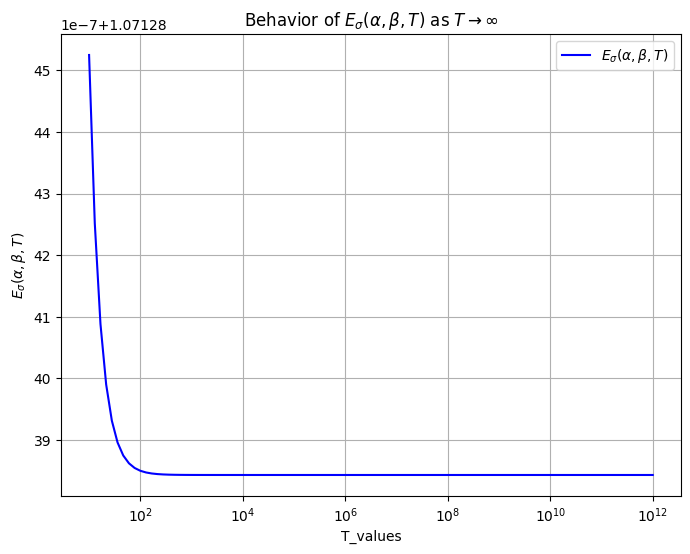

Value of E_sigma as T -> infinity (approximated): 1.0712838427838334


In [299]:
from scipy.special import gamma #For optimization of error term
import matplotlib.pyplot as plt
#This is the code that i used for finding the limit of error term when t goes to infty
# we first define the function E_sigma(alpha, beta, T)(eq 2.64)
def E_sigma(alpha, beta, sigma, T):
    # First term: exponential part
    exponent = alpha * (((2 - 2 * sigma) * (1 / (2 * T)) ** beta) + ((2 * sigma - 1) * ((1 / T) ** beta)) - ((sigma / T) ** beta) + 1)
    exp_term = np.exp(exponent)

    # Second term: Gamma term
    gamma_term = ((alpha ** (-4 / (3 * beta))) * (gamma((4 / (3 * beta)) + 1))) ** (2 - 2 * sigma)

    # Return the full expression
    return exp_term * gamma_term

# Set values for alpha, beta, sigma, and T (large T)
alpha = 0.013
beta = 2
sigma = 0.99
T_values = np.logspace(1, 12, 100)

# Compute E_sigma for large T values
E_values = [E_sigma(alpha, beta, sigma, T) for T in T_values]

# Plot the result
plt.figure(figsize=(8, 6))
plt.plot(T_values, E_values, label=r"$E_\sigma(\alpha, \beta, T)$", color='blue')
plt.xscale('log')
plt.xlabel(r'T_values')
plt.ylabel(r'$E_\sigma(\alpha, \beta, T)$')
plt.title(r"Behavior of $E_\sigma(\alpha, \beta, T)$ as $T \to \infty$")
plt.grid(True)
plt.legend()
plt.show()

print(f"Value of E_sigma as T -> infinity (approximated): {E_values[-1]}")